In [1]:
import xarray as xr
import xrft
import numpy as np
import dask
from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
print(xr.__version__)
print(dask.__version__)

0.9.5-1-gab4ffee
0.14.3+71.ga70f3c7


In [44]:
client.shutdown()

In [3]:
#from dask.utils import SerializableLock
from dask.distributed import Client, wait
client = Client(scheduler_file='../../.dask_schedule_file.json')
#client.restart()
client

Client Scheduler: tcp://10.43.8.184:8786 Dashboard: http://10.43.8.184:8787,Cluster Workers: 60 Cores: 60 Memory: 647.52 GB


In [ ]:
client

In [12]:
def dask_version():
    import dask
    return dask.__version__
client.run(dask_version)

{'tcp://10.43.8.185:50391': '0.14.3+71.ga70f3c7',
 'tcp://10.43.8.186:40217': '0.14.3+71.ga70f3c7',
 'tcp://10.43.8.187:44292': '0.14.3+71.ga70f3c7',
 'tcp://10.43.8.188:55464': '0.14.3+71.ga70f3c7',
 'tcp://10.43.8.189:34538': '0.14.3+71.ga70f3c7',
 'tcp://10.43.8.190:35725': '0.14.3+71.ga70f3c7',
 'tcp://10.43.8.191:40153': '0.14.3+71.ga70f3c7',
 'tcp://10.43.8.192:43679': '0.14.3+71.ga70f3c7',
 'tcp://10.43.8.193:58445': '0.14.3+71.ga70f3c7',
 'tcp://10.43.8.194:60650': '0.14.3+71.ga70f3c7'}

In [30]:
client.shutdown()

In [4]:
ddir = '/rigel/ocp/users/ra2697/LLC/llc_4320_agulhas/'
#all_files = sorted(glob(ddir + '*.00000*.nc'))
all_files = sorted(glob(ddir + '*.nc'))
print(len(all_files))
print(all_files[0], all_files[-1])

1753
/rigel/ocp/users/ra2697/LLC/llc_4320_agulhas/llc_4320_agulhas.0000010368.nc /rigel/ocp/users/ra2697/LLC/llc_4320_agulhas/llc_4320_agulhas_grid.nc


In [5]:
%time ds = xr.open_mfdataset(all_files, autoclose=False, decode_cf=False)

CPU times: user 54.1 s, sys: 9.21 s, total: 1min 3s
Wall time: 25min 27s


In [6]:
ds.time.attrs['units'] = 'seconds since 2011-01-01'
ds['time'] = xr.decode_cf(ds.time.to_dataset(name='foo')).time
ds.time

<xarray.DataArray 'time' (time: 1752)>
array(['2011-01-04T00:00:00.000000000', '2011-01-04T01:00:00.000000000',
       '2011-01-04T02:00:00.000000000', ..., '2011-03-17T21:00:00.000000000',
       '2011-03-17T22:00:00.000000000', '2011-03-17T23:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-01-04 2011-01-04T01:00:00 ...
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T

In [25]:
ds['time'].data = np.arange(len(ds.time))

In [15]:
ds

<xarray.Dataset>
Dimensions:   (i: 2160, i_g: 2160, j: 2160, j_g: 2160, k: 90, k_l: 90, k_p1: 91, k_u: 90, time: 1752)
Coordinates:
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g       (j_g) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i         (i) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
  * j         (j) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i_g       (i_g) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
  * time      (time) float64 2.592e+05 2.628e+05 2.664e+05 2.7e+05 2.736e+05 ...
Data variables:
    face      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    YC        (j, i) float32 -57.001 -57.001 -57.001 

In [32]:
%time ds['Salt'][80,30,400,2000].load()

CPU times: user 10.2 ms, sys: 28.8 ms, total: 39 ms
Wall time: 8.73 s


<xarray.DataArray 'Salt' ()>
array(34.61188507080078, dtype=float32)
Coordinates:
    k        int64 30
    i        int64 3080
    j        float64 400.0
    time     float64 5.472e+05
Attributes:
    standard_name:  SALT
    long_name:      Salinity
    units:          psu
    coordinates:    iter

In [33]:
%time ds['Salt'][600,0].load()

CPU times: user 15.8 ms, sys: 13 ms, total: 28.8 ms
Wall time: 482 ms


<xarray.DataArray 'Salt' (j: 2160, i: 2160)>
array([[ 33.872375,  33.877258,  33.877724, ...,  33.957432,  33.956905,
         33.956108],
       [ 33.872089,  33.875854,  33.876736, ...,  33.955616,  33.954514,
         33.952827],
       [ 33.874229,  33.875317,  33.876205, ...,  33.951832,  33.950367,
         33.948357],
       ..., 
       [ 36.045208,  36.049473,  36.059837, ...,   0.      ,   0.      ,   0.      ],
       [ 36.041706,  36.044117,  36.054615, ...,   0.      ,   0.      ,   0.      ],
       [ 36.04184 ,  36.041698,  36.050648, ...,   0.      ,   0.      ,   0.      ]], dtype=float32)
Coordinates:
    k        int64 0
  * i        (i) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
  * j        (j) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
    time     float64 2.419e+06
Attributes:
    standard_name:  SALT
    long_name:      Salinity
    units:          psu
    coordinates:    iter

In [21]:
%time ds['Salt'][200,0].load()

CPU times: user 24.7 ms, sys: 24.5 ms, total: 49.2 ms
Wall time: 31.7 s


<xarray.DataArray 'Salt' (j: 2160, i: 2160)>
array([[ 33.857441,  33.86301 ,  33.863747, ...,  33.91732 ,  33.917435,
         33.916698],
       [ 33.853828,  33.861584,  33.862976, ...,  33.91758 ,  33.917431,
         33.916931],
       [ 33.849178,  33.85981 ,  33.862152, ...,  33.916771,  33.916515,
         33.916042],
       ..., 
       [ 36.044865,  36.054409,  36.06596 , ...,   0.      ,   0.      ,   0.      ],
       [ 36.039825,  36.055721,  36.071548, ...,   0.      ,   0.      ,   0.      ],
       [ 36.033669,  36.05698 ,  36.074364, ...,   0.      ,   0.      ,   0.      ]], dtype=float32)
Coordinates:
    k        int64 0
  * i        (i) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
  * j        (j) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
    time     float64 9.792e+05
Attributes:
    standard_name:  SALT
    long_name:      Salinity
    units:          psu
    coordinates:    iter

In [17]:
time ds['Salt'][90].load()

CPU times: user 767 ms, sys: 1.64 s, total: 2.41 s
Wall time: 46 s


<xarray.DataArray 'Salt' (k: 90, j: 2160, i: 2160)>
array([[[ 33.781357,  33.797127, ...,  33.917755,  33.91806 ],
        [ 33.78828 ,  33.802494, ...,  33.919281,  33.91935 ],
        ..., 
        [ 36.076653,  36.088486, ...,   0.      ,   0.      ],
        [ 36.091415,  36.095966, ...,   0.      ,   0.      ]],

       [[ 33.781662,  33.797367, ...,  33.917591,  33.917892],
        [ 33.788521,  33.802753, ...,  33.919106,  33.919178],
        ..., 
        [ 36.076546,  36.088158, ...,   0.      ,   0.      ],
        [ 36.091156,  36.095528, ...,   0.      ,   0.      ]],

       ..., 
       [[  0.      ,   0.      , ...,   0.      ,   0.      ],
        [  0.      ,   0.      , ...,   0.      ,   0.      ],
        ..., 
        [  0.      ,   0.      , ...,   0.      ,   0.      ],
        [  0.      ,   0.      , ...,   0.      ,   0.      ]],

       [[  0.      ,   0.      , ...,   0.      ,   0.      ],
        [  0.      ,   0.      , ...,   0.      ,   0.      ],
     

In [34]:
# workers die when I do this - not with single threaded
sss_p = ds['Salt'][:,0,1080].persist()

In [35]:
s_20m_p = ds['Salt'][:,20].persist()

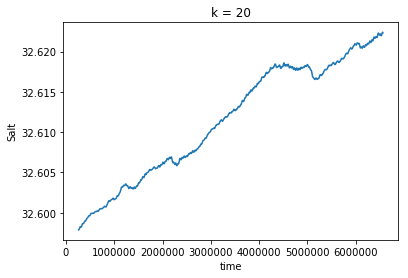

In [37]:
s_20m_p.mean(dim=['j', 'i']).plot()

In [6]:
s_full_p = ds['Salt'].persist()

In [7]:
s_full_p.mean(dim=['j','i']).plot()

distributed.utils - ERROR - ('mean_agg-aggregate-6cc57b4b65afbfb8c9f875fc8add88ed', 1718, 0)
Traceback (most recent call last):
  File "/rigel/home/ra2697/distributed/distributed/client.py", line 1097, in _gather
    st = self.futures[key]
KeyError: "('mean_agg-aggregate-6cc57b4b65afbfb8c9f875fc8add88ed', 1718, 0)"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/rigel/home/ra2697/distributed/distributed/utils.py", line 212, in f
    result[0] = yield make_coro()
  File "/rigel/home/ra2697/miniconda/envs/dask_distributed/lib/python3.5/site-packages/tornado/gen.py", line 1015, in run
    value = future.result()
  File "/rigel/home/ra2697/miniconda/envs/dask_distributed/lib/python3.5/site-packages/tornado/concurrent.py", line 237, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 3, in raise_exc_info
  File "/rigel/home/ra2697/miniconda/envs/dask_distributed/lib/python3.5/site-packages/tornado/gen.py", li

KeyboardInterrupt: 

In [12]:
prefix = 'llc_4320_agulhas'
outdir = ddir + '/weekly_avg/'
outdir

'/rigel/ocp/users/ra2697/LLC/llc_4320_agulhas//weekly_avg/'

In [7]:
# should experiment more with chunk size
dsc = ds.chunk({'time': 1, 'k': 5, 'k_l': 5, 'k_u': 5, 'k_p1': 5})

In [14]:
theta_persist = dsc['Theta'].persist()

In [8]:
ds_daily = dsc.resample('D', 'time')

In [11]:
daily_mean_theta_profile = ds_daily['Theta'].mean(dim=['j', 'i']).load()

KeyboardInterrupt: 

distributed.utils - ERROR - ('mean_agg-aggregate-04507d69f9ebaa6e3c9b07012f60e077', 18, 4)
Traceback (most recent call last):
  File "/rigel/home/ra2697/distributed/distributed/client.py", line 1097, in _gather
    st = self.futures[key]
KeyError: "('mean_agg-aggregate-04507d69f9ebaa6e3c9b07012f60e077', 18, 4)"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/rigel/home/ra2697/distributed/distributed/utils.py", line 212, in f
    result[0] = yield make_coro()
  File "/rigel/home/ra2697/miniconda/envs/dask_distributed/lib/python3.5/site-packages/tornado/gen.py", line 1015, in run
    value = future.result()
  File "/rigel/home/ra2697/miniconda/envs/dask_distributed/lib/python3.5/site-packages/tornado/concurrent.py", line 237, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 3, in raise_exc_info
  File "/rigel/home/ra2697/miniconda/envs/dask_distributed/lib/python3.5/site-packages/tornado/gen.py", line 1

In [9]:
# we output got the first 26
ds_daily = ds_daily.isel(time=slice(26,None))
ds_daily.time

<xarray.DataArray 'time' (time: 47)>
array(['2011-01-30T00:00:00.000000000', '2011-01-31T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-02-02T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-02-04T00:00:00.000000000',
       '2011-02-05T00:00:00.000000000', '2011-02-06T00:00:00.000000000',
       '2011-02-07T00:00:00.000000000', '2011-02-08T00:00:00.000000000',
       '2011-02-09T00:00:00.000000000', '2011-02-10T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-02-12T00:00:00.000000000',
       '2011-02-13T00:00:00.000000000', '2011-02-14T00:00:00.000000000',
       '2011-02-15T00:00:00.000000000', '2011-02-16T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-18T00:00:00.000000000',
       '2011-02-19T00:00:00.000000000', '2011-02-20T00:00:00.000000000',
       '2011-02-21T00:00:00.000000000', '2011-02-22T00:00:00.000000000',
       '2011-02-23T00:00:00.000000000', '2011-02-24T00:00:00.000000000',
       '2011-0

In [10]:
ds_daily.isel(time=0)['iter'].load()

<xarray.DataArray 'iter' ()>
array(101880.0)
Coordinates:
    time     datetime64[ns] 2011-01-30

In [11]:
%time daily_iternum = ds_daily['iter'].load()

CPU times: user 2.38 s, sys: 3.34 s, total: 5.72 s
Wall time: 1min 50s


In [13]:
iternum = [int(i) for i in daily_iternum]

In [14]:
keep_vars = ['U', 'V', 'W']

In [ ]:
for nt, i in enumerate(tqdm(iternum)):
    ds_day = ds_daily.isel(time=nt)
    dsets = [ds_day[v].load() for v in keep_vars]
    merged = xr.merge(dsets, )
    fname = outdir + '%s_uvw_daily.%010d.nc' % (prefix, i)
    merged.to_netcdf(fname)

 51%|█████     | 24/47 [2:50:37<5:13:52, 818.78s/it]

In [14]:
ds_weekly = dsc.resample('7D', 'time')
ds_weekly.time

<xarray.DataArray 'time' (time: 11)>
array(['2011-01-04T00:00:00.000000000', '2011-01-11T00:00:00.000000000',
       '2011-01-18T00:00:00.000000000', '2011-01-25T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-02-08T00:00:00.000000000',
       '2011-02-15T00:00:00.000000000', '2011-02-22T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-03-08T00:00:00.000000000',
       '2011-03-15T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-01-04 2011-01-11 2011-01-18 ...

In [15]:
%time weekly_iternum = ds_weekly['iter'].load()

CPU times: user 3.51 s, sys: 3.85 s, total: 7.35 s
Wall time: 2min 39s


In [ ]:
keep_vars = ['U', 'V', 'W']
for nt, i in enumerate(tqdm(weekly_iternum)):
    ds_week = ds_weekly.isel(time=nt)
    dsets = [ds_week[v].load() for v in keep_vars]
    merged = xr.merge(dsets, )
    fname = outdir + '%s_uvw_weekly.%010d.nc' % (prefix, i)
    merged.to_netcdf(fname)

 45%|████▌     | 5/11 [3:07:13<3:46:00, 2260.16s/it]

In [46]:
client.run(lambda dask_worker: dask_worker.worker_dir, nanny=True)

{'tcp://10.43.8.132:47460': '/local'}

In [ ]:
import env

In [ ]:
eos.environ['DASK_SCHEDULER_FILE']